### HW3 - Question 1

##### Part 1 - 1

In [ ]:
!pip install jovian --upgrade --quiet

import jovian


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [48]:
from google.colab import files

uploaded = files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [49]:
! kaggle datasets download franciscoescobar/satellite-images-of-water-bodies/

satellite-images-of-water-bodies.zip: Skipping, found more recently modified local copy (use --force to force download)


In [50]:
# Put on the same directory
from zipfile import ZipFile

# specifying the name of the zip file
file = "satellite-images-of-water-bodies.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as zip1:
    # list all the contents of the zip file
    zip1.printdir()

    # extract all files
    print('extraction...')
    zip1.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
Water Bodies Dataset/Images/water_body_1810.jpg 2020-05-18 01:02:52         2496
Water Bodies Dataset/Images/water_body_1811.jpg 2020-05-18 01:02:52         6470
Water Bodies Dataset/Images/water_body_1812.jpg 2020-05-18 01:02:52       332207
Water Bodies Dataset/Images/water_body_1813.jpg 2020-05-18 01:02:52         8613
Water Bodies Dataset/Images/water_body_1814.jpg 2020-05-18 01:02:52         5665
Water Bodies Dataset/Images/water_body_1815.jpg 2020-05-18 01:02:52         2213
Water Bodies Dataset/Images/water_body_1816.jpg 2020-05-18 01:02:52        37916
Water Bodies Dataset/Images/water_body_1817.jpg 2020-05-18 01:02:52         4316
Water Bodies Dataset/Images/water_body_1818.jpg 2020-05-18 01:02:52        18662
Water Bodies Dataset/Images/water_body_1819.jpg 2020-05-18 01:02:52         3211
Water Bodies Dataset/Images/water_body_182.jpg 2020-05-18 01:02:52         1795
Water Bodies Dataset/Images/water_body_1820.jpg 2020-05-18 

In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [52]:
def read_images_and_masks(folder_path, image_size, threshold=0.9):
    images = []
    masks = []

    images_folder = os.path.join(folder_path, 'Images')
    masks_folder = os.path.join(folder_path, 'Masks')

    for filename in os.listdir(images_folder):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Read the mask
            mask = cv2.imread(os.path.join(masks_folder, filename))
            mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
            mask_gray[mask_gray>127] = 255
            mask_gray[mask_gray<=127] = 0

            # Calculate the percentage of white and black pixels in the mask
            total_pixels = mask_gray.shape[0] * mask_gray.shape[1]
            white_pixels = np.count_nonzero(mask_gray == 255)
            black_pixels = np.count_nonzero(mask_gray == 0)
            white_percentage = white_pixels / total_pixels
            black_percentage = black_pixels / total_pixels

            # Exclude the image and mask if the percentage exceeds the threshold
            if white_percentage >= threshold or black_percentage >= threshold:
                continue

            # Read and resize the image
            img = cv2.imread(os.path.join(images_folder, filename))
            img = cv2.resize(img, image_size)

            # Resize the mask
            mask_resized = cv2.resize(mask_gray, image_size)
            mask_resized = np.expand_dims(mask_resized, axis=2)

            images.append(img)
            masks.append(mask_resized)

    return np.array(images) , np.array(masks)

In [53]:
size = (256, 256)
folder_path = 'Water Bodies Dataset'
images, masks = read_images_and_masks(folder_path, size, threshold=0.60)

print("Images Matrix shape:", images.shape)
print("Masks Matrix shape:", masks.shape)

Images Matrix shape: (551, 256, 256, 3)
Masks Matrix shape: (551, 256, 256, 1)


In [54]:
# cropped_images = iimages[:, 14:242, 14:242, :]
# cropped_masks = imasks[:, 14:242, 14:242, :]

# images = np.pad(cropped_images, ((0, 0), (14, 14), (14, 14), (0, 0)), mode='constant', constant_values=0)
# masks = np.pad(cropped_masks, ((0, 0), (14, 14), (14, 14), (0, 0)), mode='constant', constant_values=0)

# print("Images Matrix shape:", images.shape)
# print("Masks Matrix shape:", masks.shape)

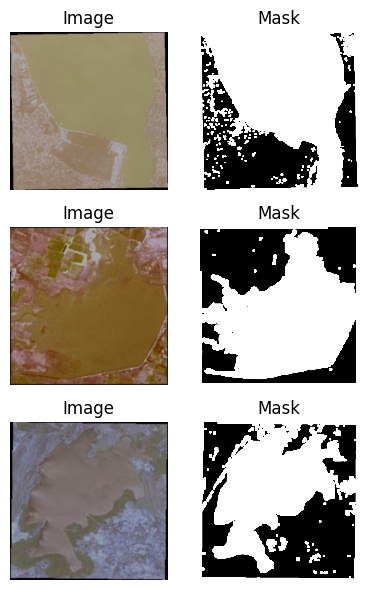

In [55]:
# for i in range(1000, 1011):
#     plt.subplot(1, 2, 1)
#     plt.imshow(images[i])

#     plt.subplot(1, 2, 2)
#     plt.imshow(masks[i])

#     plt.show()
# Generate random indices to select random images
random_indices = np.random.choice(images.shape[0], size=3, replace=False)

# Plot the random images and their masks
fig, axes = plt.subplots(3, 2, figsize=(4, 6))

for i, idx in enumerate(random_indices):
    image = images[idx]
    mask = masks[idx]

    # Plot the image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image')

    # Plot the mask
    axes[i, 1].imshow(mask, cmap='gray', vmin=0, vmax=1)
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Mask')

plt.tight_layout()
plt.show()

In [56]:
# from skimage import morphology

# reshaped_masks = np.reshape(masks, (masks.shape[0] * masks.shape[1], masks.shape[2]))
# footprint = morphology.disk(1)
# filtered_masks = morphology.white_tophat(reshaped_masks, footprint)
# filtered_masks = filtered_masks.reshape(masks.shape)
# print("Masks Matrix shape after filtering:", filtered_masks.shape)

In [60]:
from sklearn.model_selection import train_test_split
img_train, img_test, mask_train, mask_test = train_test_split(images, masks, test_size=0.1, random_state=12)

print("img_train shape:",img_train.shape)
print("mask_train shape:",mask_train.shape)
print("img_test shape:",img_test.shape)
print("mask_test shape:",mask_test.shape)

img_train shape: (495, 256, 256, 3)
mask_train shape: (495, 256, 256, 1)
img_test shape: (56, 256, 256, 3)
mask_test shape: (56, 256, 256, 1)


##### Part 1 - 3

In [61]:
import albumentations as A
from builtins import zip as my_zip

# Convert images and masks to uint8 data type
img_train_uint8 = img_train.astype(np.uint8)
mask_train_uint8 = mask_train.astype(np.uint8)

# Define the augmentation pipeline
augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=50, p=0.5),
    # A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    A.GridDistortion(p=0.1),
    A.HueSaturationValue(p=0.1),
])

# Apply augmentation to training images and masks
augmented_images = []
augmented_masks = []
for image, mask in my_zip(img_train_uint8, mask_train_uint8):
    augmented = augmentation_pipeline(image=image, mask=mask)
    augmented_images.append(augmented['image'])
    augmented_masks.append(augmented['mask'])

# Convert augmented images and masks back to float64 data type
augmented_images = np.array(augmented_images)
augmented_masks = np.array(augmented_masks)

print("Augmented Images Matrix shape:", augmented_images.shape)
print("Augmented Masks Matrix shape:", augmented_masks.shape)

Augmented Images Matrix shape: (495, 256, 256, 3)
Augmented Masks Matrix shape: (495, 256, 256, 1)


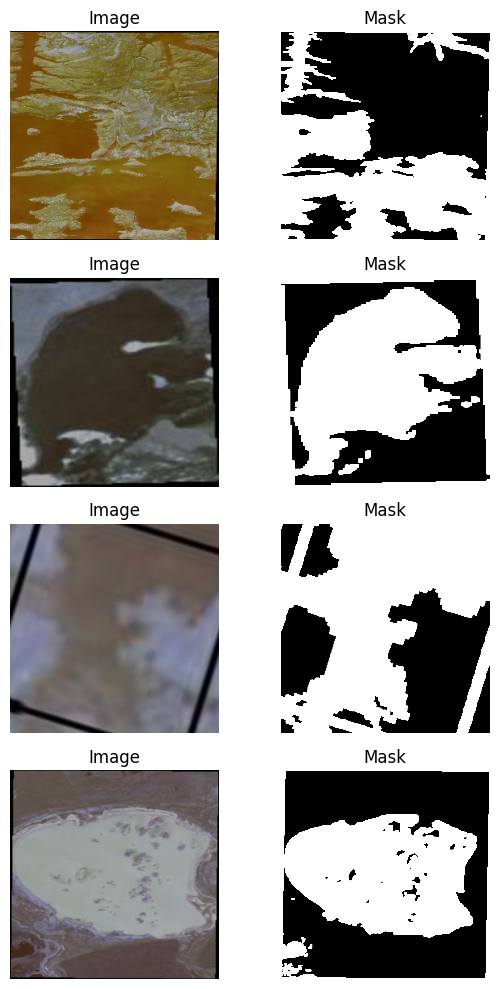

In [62]:
# Generate random indices to select random images
random_indices = np.random.choice(augmented_images.shape[0], size=4, replace=False)

# Plot the random images and their masks
fig, axes = plt.subplots(4, 2, figsize=(6, 10))

for i, idx in enumerate(random_indices):
    image = augmented_images[idx]
    mask = augmented_masks[idx]

    # Plot the image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image')

    # Plot the mask
    axes[i, 1].imshow(mask, cmap='gray', vmin=0, vmax=1)
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Mask')

plt.tight_layout()
plt.show()

In [63]:
# Concatenate augmented images and masks with original training data
img_train_augmented = np.concatenate((img_train, augmented_images))
mask_train_augmented = np.concatenate((mask_train, augmented_masks))

print("Augmented Training Images Matrix shape:", img_train_augmented.shape)
print("Augmented Training Masks Matrix shape:", mask_train_augmented.shape)

Augmented Training Images Matrix shape: (990, 256, 256, 3)
Augmented Training Masks Matrix shape: (990, 256, 256, 1)


In [64]:
mask_train_augmented = np.squeeze(mask_train_augmented, axis=-1)

In [65]:
mask_test = np.squeeze(mask_test, axis = -1)
print(mask_test.shape)

(56, 256, 256)


In [15]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00


#### Part 1 - 4 & 1 - 5

In [16]:
# creat my dataset
import numpy as np
from datasets import Dataset
from PIL import Image

img_train_uint8 = img_train_augmented.astype(np.uint8)
mask_train_uint8 = mask_train_augmented.astype(np.uint8)

# Convert the NumPy arrays to Pillow images and store them in a dictionary
dataset_dict = {
    "image": [Image.fromarray(img.squeeze()) for img in img_train_uint8],
    "mask": [Image.fromarray(mask.squeeze()) for mask in mask_train_uint8],
}

# Create the dataset using the datasets.Dataset class
dataset = Dataset.from_dict(dataset_dict)

In [17]:
from transformers import SamModel
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

class SAM(Dataset):
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    water_body = self.dataset[idx]
    raw_image = water_body["image"]
    normalized_images = [np.array(image) / 255.0 for image in raw_image]
    real_mask = [np.array(mask).astype(np.uint8) / 255.0 for mask in water_body["mask"]]
    # binary_mask = [np.array(Image.fromarray(mask).convert("1")) for mask in real_mask]
    resulting_mask = np.stack(real_mask, axis=0)
    prompt = bounding_box(resulting_mask)
    data = self.processor(normalized_images, input_boxes=prompt, return_tensors="pt")
    data = {a: b.squeeze(0) for a, b in data.items()}
    data["real_mask"] = real_mask

    return data

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [18]:
pip install monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.4 MB/s eta 0:00:00


In [19]:
def bounding_box(masks):
    bounding_boxes = []
    for mask in masks:
        height, width = mask.shape
        y_white, x_white = np.where(mask > 0)

        x_min = np.min(x_white)
        x_max = np.max(x_white)
        y_min = np.min(y_white)
        y_max = np.max(y_white)

        x_min = max(0, x_min - np.random.randint(0, 10))
        x_max = min(width, x_max + np.random.randint(0, 10))
        y_min = max(0, y_min - np.random.randint(0, 10))
        y_max = min(height, y_max + np.random.randint(0, 10))

        bounding_boxes.append([[x_min, y_min, x_max, y_max]])

    return bounding_boxes

In [20]:
from torch.utils.data import DataLoader

train_data = SAM(dataset=dataset, processor=processor)
train_batched_data = DataLoader(train_data, batch_size=3, shuffle=True)
model = SamModel.from_pretrained("facebook/sam-vit-base")

# freeze vision encoder and prompt encoder and fine tune using mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [21]:
from torch.optim import Adam
import monai
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-4, weight_decay=0)
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [ ]:
import torch
from tqdm import tqdm
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

num_epochs = 8
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

losses = []
ious = []  # List to store IoU values

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    epoch_ious = []  # IoU values for the epoch

    for batch in tqdm(train_batched_data):
        # Move the input tensors to the GPU
        batch = {key: value.to(device) for key, value in batch.items()}

        outputs = model(pixel_values=batch["pixel_values"], input_boxes=batch["input_boxes"], multimask_output=False)
        predicted_masks = outputs.pred_masks.squeeze(1)
        loss = seg_loss(predicted_masks, batch["real_mask"].unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())

        # Calculate IoU for each prediction and target mask in the batch
        for pred_mask, target_mask in zip(predicted_masks, batch["real_mask"]):
            pred_mask = pred_mask.cpu().detach().numpy().astype(bool)
            target_mask = target_mask.cpu().detach(f).numpy().astype(bool)
            iou = jaccard_score(target_mask.flatten(), pred_mask.flatten())
            epoch_ious.append(iou)

    mean_loss = mean(epoch_losses)
    losses.append(mean_loss)
    mean_iou = mean(epoch_ious)
    ious.append(mean_iou)

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean_loss}')
    print(f'Mean IoU: {mean_iou}')


100%|██████████| 330/330 [08:58<00:00,  1.63s/it]


EPOCH: 0
Mean loss: 0.6932275555533919
Mean IoU: 0.4557304921776357


100%|██████████| 330/330 [08:42<00:00,  1.58s/it]


EPOCH: 1
Mean loss: 0.6625483774201759
Mean IoU: 0.4557304921776357


100%|██████████| 330/330 [08:43<00:00,  1.59s/it]


EPOCH: 2
Mean loss: 0.6541142632691903
Mean IoU: 0.4557304921776357


100%|██████████| 330/330 [08:28<00:00,  1.54s/it]


EPOCH: 3
Mean loss: 0.6462202097546856
Mean IoU: 0.4557304921776357


100%|██████████| 330/330 [08:22<00:00,  1.52s/it]


EPOCH: 4
Mean loss: 0.6403340332665289
Mean IoU: 0.45573049819016725


100%|██████████| 330/330 [08:33<00:00,  1.56s/it]


EPOCH: 5
Mean loss: 0.6396234728712006
Mean IoU: 0.4557304921776357


100%|██████████| 330/330 [08:38<00:00,  1.57s/it]


EPOCH: 6
Mean loss: 0.633090736384166
Mean IoU: 0.4557304921776357


100%|██████████| 330/330 [08:39<00:00,  1.57s/it]

EPOCH: 7
Mean loss: 0.6320083490081712
Mean IoU: 0.4557304921776357


In [ ]:
# import torch
# from tqdm import tqdm
# from statistics import mean
# import matplotlib.pyplot as plt
# from sklearn.metrics import jaccard_score

# num_epochs = 8
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model.to(device)

# losses = []
# ious = []  # List to store IoU values
# dice_coefficients = []  # List to store Dice coefficients

# model.train()
# for epoch in range(num_epochs):
#     epoch_losses = []
#     epoch_ious = []  # IoU values for the epoch
#     epoch_dice_coefficients = []  # Dice coefficients for the epoch

#     for batch in tqdm(train_batched_data):
#         # Move the input tensors to the GPU
#         batch = {key: value.to(device) for key, value in batch.items()}

#         outputs = model(pixel_values=batch["pixel_values"], input_boxes=batch["input_boxes"], multimask_output=False)
#         predicted_masks = outputs.pred_masks.squeeze(1)
#         loss = seg_loss(predicted_masks, batch["real_mask"].unsqueeze(1))
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         epoch_losses.append(loss.item())

#         # Calculate IoU and Dice coefficient for each prediction and target mask in the batch
#         for pred_mask, target_mask in zip(predicted_masks, batch["real_mask"]):
#             pred_mask = pred_mask.cpu().detach().numpy().astype(bool)
#             target_mask = target_mask.cpu().detach().numpy().astype(bool)
#             intersection = np.logical_and(pred_mask, target_mask)
#             union = np.logical_or(pred_mask, target_mask)
#             iou = np.sum(intersection) / np.sum(union)
#             dice_coefficient = (2.0 * np.sum(intersection)) / (np.sum(pred_mask) + np.sum(target_mask))

#             epoch_ious.append(iou)
#             epoch_dice_coefficients.append(dice_coefficient)

#     mean_loss = mean(epoch_losses)
#     losses.append(mean_loss)
#     mean_iou = mean(epoch_ious)
#     ious.append(mean_iou)
#     mean_dice_coefficient = mean(epoch_dice_coefficients)
#     dice_coefficients.append(mean_dice_coefficient)

#     print(f'EPOCH: {epoch}')
#     print(f'Mean loss: {mean_loss}')
#     print(f'Mean IoU: {mean_iou}')
#     print(f'Mean Dice Coefficient: {mean_dice_coefficient}')

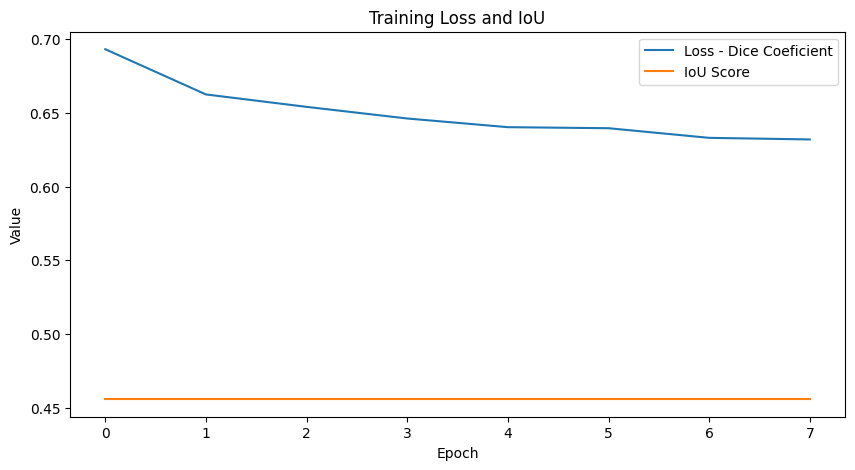

In [ ]:
# Plot the loss and IoU on the same plot
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss - Dice Coeficient')
plt.plot(ious, label='IoU Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and IoU')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')
torch.save(model.state_dict(), "/content/mydrive/MyDrive/Colab Notebooks/SAM_Model.pth")

Mounted at /content/mydrive


In [ ]:
from transformers import SamModel, SamConfig, SamProcessor

model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

test_model = SamModel(config=model_config)
test_model.load_state_dict(torch.load("/content/mydrive/MyDrive/Colab Notebooks/SAM_Model.pth"))

device = "cuda" if torch.cuda.is_available() else "cpu"
test_model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

In [66]:
def bounding_box_test(ground_truth_map):
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 10))
  x_max = min(W, x_max + np.random.randint(0, 10))
  y_min = max(0, y_min - np.random.randint(0, 10))
  y_max = min(H, y_max + np.random.randint(0, 10))
  box = np.array([x_min, y_min, x_max, y_max])

  return box

In [28]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 1.3 MB/s eta 0:00:00


In [29]:
import cv2
import numpy as np
import supervision as sv


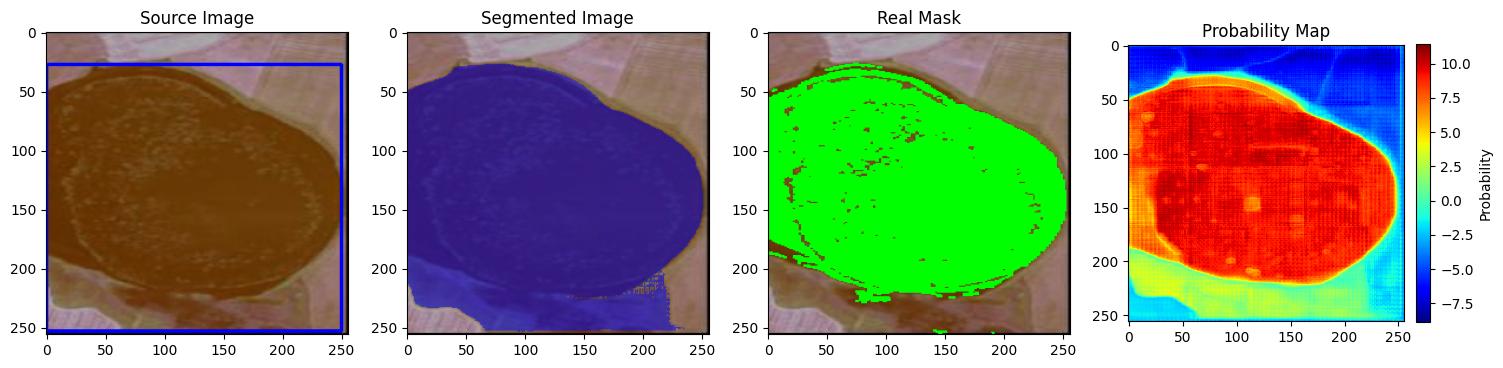

IoU Score: 0.7890883626177744
Dice Coefficient: 0.8342266936164776


In [73]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score


# Select a random index from img_test
random_index = random.randint(0, img_test.shape[0] - 1)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

image_rgb = img_test[random_index, :, :, :]

prompt = bounding_box_test(mask_test[random_index, :, :, :])
inputs = processor(image_rgb, input_boxes=[[prompt]], return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}
test_model.eval()
with torch.no_grad():
    outputs = test_model(**inputs, multimask_output=False)

box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red(), color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_rgb.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_rgb.copy(), detections=detections)

# Plotting the real mask from mask_test
real_mask = mask_test[random_index, :, :]
real_mask_overlay = image_rgb.copy()
real_mask_overlay[real_mask > 0] = [0, 255, 0]  # Overlay the mask in green on the image

# Plotting all the images
axs[0].imshow(source_image)
axs[0].set_title('Source Image')
axs[1].imshow(segmented_image)
axs[1].set_title('Segmented Image')
axs[2].imshow(real_mask_overlay)
axs[2].set_title('Real Mask')

# Plotting the probability map for the predicted mask
probability_map = np.max(logits, axis=0)
axs[3].imshow(probability_map, cmap='jet')
axs[3].set_title('Probability Map')

# Add colorbar to the probability map
cbar = fig.colorbar(axs[3].imshow(probability_map, cmap='jet'), ax=axs[3], fraction=0.046, pad=0.04)
cbar.set_label('Probability')

plt.tight_layout()
plt.show()

# Calculate IoU score and Dice coefficient
predicted_mask = (masks > 0).astype(int)
intersection = np.logical_and(predicted_mask, real_mask)
intersection_sum = np.sum(intersection)
predicted_sum = np.sum(predicted_mask)
real_sum = np.sum(real_mask)
dice_coefficient = (200 * intersection_sum) / (predicted_sum + real_sum)
union = np.logical_or(predicted_mask, real_mask)
iou_score = np.sum(intersection) / np.sum(union)

# Print IoU score and Dice coefficient
print("IoU Score:", iou_score)
print("Dice Coefficient:", dice_coefficient)